In [4]:
# Import the necessary libraries
from bs4 import BeautifulSoup
import pandas as pd

/var/folders/b5/j3081dhn2bqfqgnv92hk21nm0000gn/T/ipykernel_32963/3446577510.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [22]:
with open('kaohsiung.html') as f:
    soup = BeautifulSoup(f, 'html.parser')

In [23]:
df = pd.DataFrame(columns=['time', 'type', 'building', 'address','area','price', 'floor'])


tables = soup.find_all('table')

for table in tables:
    # Iterate through each row and extract data
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        if cols[0].text == "成交時間":
            next
        else:
            new_row= pd.DataFrame([{'time': cols[0].text, 'type': cols[1].text, 'building': cols[2].text, 'address': cols[3].text, 'area': cols[4].text, 'price': cols[5].text, 'floor': cols[6].text}])
            print(new_row)
            df = pd.concat([df, new_row], ignore_index=True)


df.to_csv("kaohsiung.csv")            
    


         time  type building     address area    price  floor
0  2024/01/31  整層住家      透天厝  高雄市湖內區正義一路  45坪  16,000元  1 / 4
         time  type building    address area    price  floor
0  2024/01/30  整層住家      透天厝  高雄市楠梓區德中路  80坪  35,000元  1 / 2
         time  type building    address area    price  floor
0  2024/01/30  整層住家      透天厝  高雄市楠梓區德中路  80坪  35,000元  1 / 2
         time type building    address area    price  floor
0  2024/01/30   倉庫      透天厝  高雄市楠梓區德中路  90坪  48,000元  1 / 2
         time  type building    address area   price  floor
0  2024/01/30  獨立套房      透天厝  高雄市鳳山區瑞智街   6坪  6,000元  3 / 3
         time type building     address area    price  floor
0  2024/01/29   廠房           高雄市鳳山區文龍東路  76坪  55,000元  1 / 1
         time type building     address area    price  floor
0  2024/01/29   廠房           高雄市仁武區八德一路  75坪  32,000元  1 / 1
         time type building    address  area    price  floor
0  2024/01/29   廠房           高雄市仁武區鳳仁路  100坪  60,000元  1 / 2
         time type buildin

In [28]:
df=pd.read_csv('kaohsiung.csv',index_col='id')
def convertPrice(price):
    price_str=price.replace("元","").replace(",","")
    price_int=int(price_str)
    return price_int


df['price']=df['price'].map(convertPrice)

def cleanArea(area):
    area_str=area.replace("坪","")
    area_float=float(area_str)
    return area_float
df['area']=df['area'].map(cleanArea)

df.to_csv('kaohsiung.csv')

45.0
80.0
80.0
90.0
6.0
76.0
75.0
100.0
100.0
227.0
200.0
65.0
5.0
5.0
5.0
5.0
7.2
7.0
7.0
7.0
7.0
10.0
37.0
29.0
16.62
22.17
3.1
11.03
17.0
25.94
5.0
5.0
6.0
6.0
6.0
6.0
5.0
6.0
5.0
6.0
6.0
100.0
100.0
75.0
450.0
25.0
130.0
40.0
70.0
34.27
34.9
600.0
80.0
180.0
935.0
120.0
120.0
750.0
286.0
90.0
105.0
17.2
34.29
33.23
14.65
34.0
23.3
12.41
85.0
520.0
130.0
110.0
240.0
120.0
70.0
1000.0
40.0
33.0
42.0
21.0
45.0
48.99
70.0
16.0
80.0
45.0
200.0
60.0
95.0
100.0
140.0
100.0
67.0
13.22
23.59
15.3
12.41
24.0
17.0
10.0
720.0
52.0
10.91
20.7
8.0
14.4
6.0
23.0
26.6
6.0
150.0
40.0
29.98
24.49
15.5
31.12
12.24
12.24
25.0
104.81
60.0
72.0
120.0
150.0
250.0
170.0
80.0
5.5
17.0
10.0
19.0
28.0
90.0
70.0
23.0
55.0
80.0
750.0
35.0
340.0
24.0
130.0
12.0
34.0
44.0
37.0
28.0
5.5
5.5
120.0
750.0
110.0
185.0
130.0
90.0
750.0
186.0
130.0
60.0
60.0
60.0
60.0
19.29
17.03
25.01
25.01
15.96
23.0
5.0
24.98
54.34
14.05
90.0
120.0
200.0
25.0
8.5
22.17
18.0
15.26
46.47
17.0
12.0
12.0
48.0
64.0
100.0
137.0
75.0
22.7


In [33]:
def getCounty(address):
    county=address[3:6]
    return county
df['county']=df['address'].map(getCounty)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


plt.rcParams['font.family']='Heiti TC'
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='area', ylabel='price'>

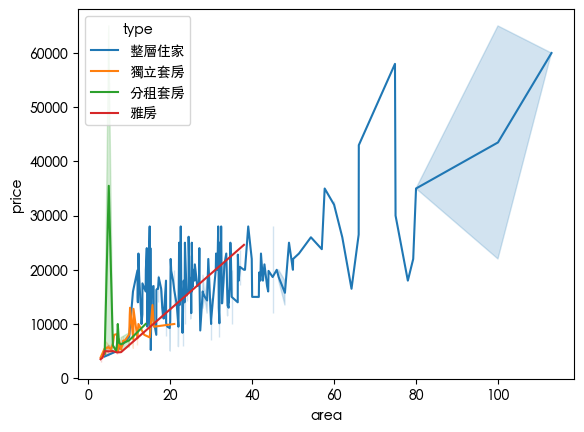

In [34]:
df_seleced=df.loc[(df['type']=='整層住家') | (df['type']=='雅房') | (df['type']=='分租套房') | (df['type']=='獨立套房') ]
sns.lineplot(x=df_seleced['area'],y=df_seleced['price'], hue=df_seleced['type'])

<Axes: xlabel='area', ylabel='price'>

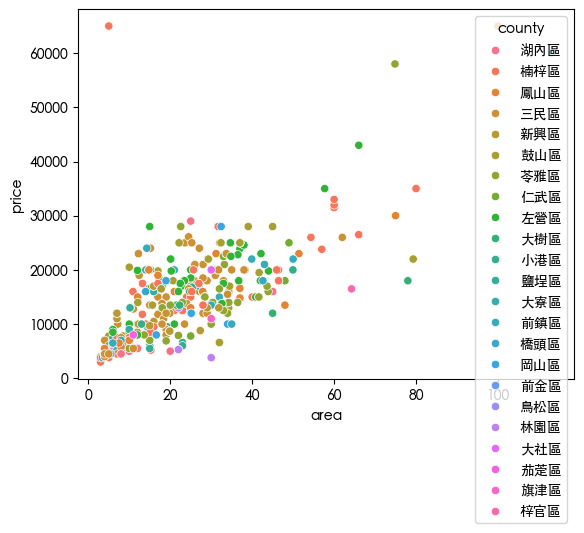

In [35]:
sns.scatterplot(x=df_seleced['area'], y=df_seleced['price'], hue=df_seleced['county'])

<Axes: xlabel='area', ylabel='price'>

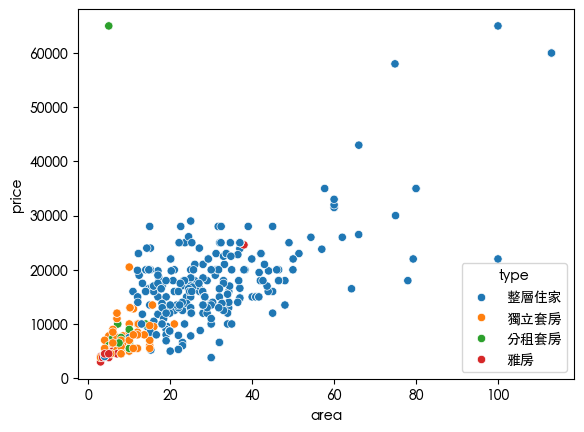

In [31]:
sns.scatterplot(x=df_seleced['area'], y=df_seleced['price'], hue=df_seleced['type'])

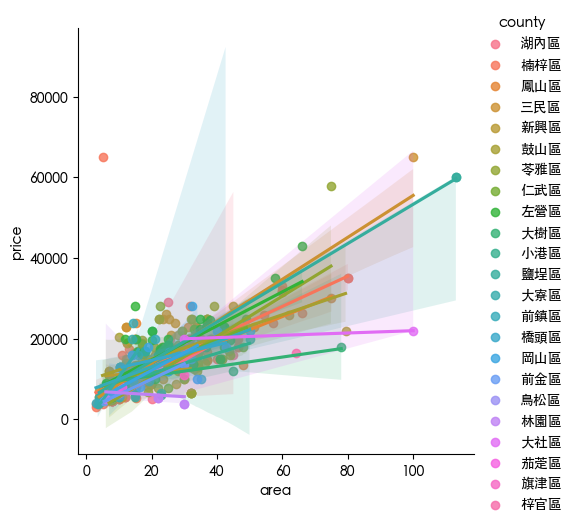

In [36]:
sns.lmplot(x="area", y="price", hue="county", data=df_seleced)

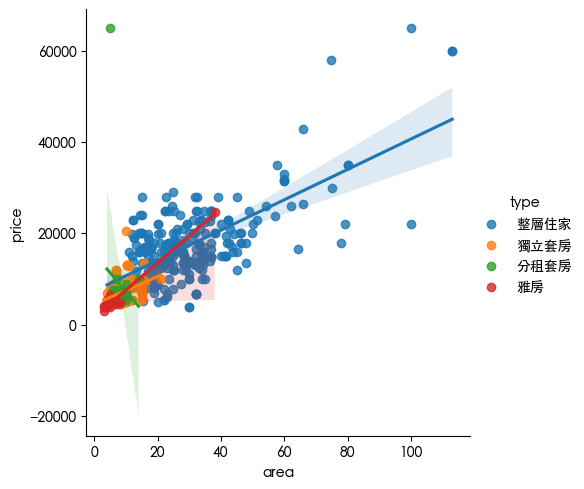

In [32]:
sns.lmplot(x="area", y="price", hue="type", data=df_seleced)

In [37]:
df_check=df_seleced.loc[df_seleced['county'] == '前金區']

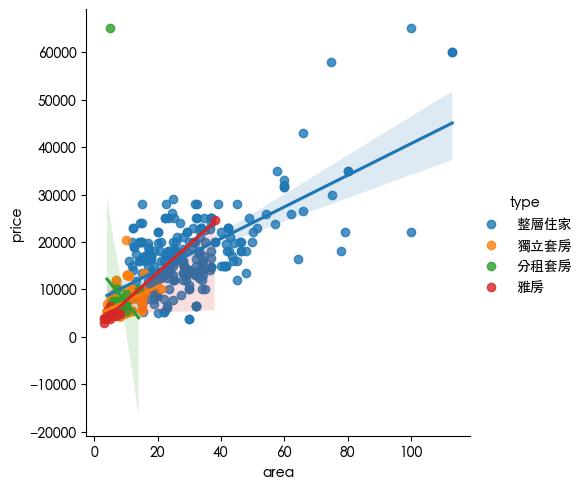

In [38]:
sns.lmplot(x="area", y="price", hue="type", data=df_seleced)